In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

IMPORT DATASET

Dataset didapat dari Kaggle bernama 'Wine Quality Dataset'. Dataset berisi 13 feature dan 1143 record dan menggambarkan jumlah berbagai bahan kimia yang ada dalam anggur varian merah "Vinho Verde" dan efeknya pada kualitasnya.

In [2]:
df = pd.read_csv("Wine Quality Dataset.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


DATA CLEANING

Melakukan penanganan pada data null

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

EXPLORATORY DATA ANALYSIS

Pada tahap ini akan menganalisis secara statistik dari semua fitur untuk mencari tahu bagaimana distribusinya. Pemodelan dengan Naive Bayes menganggap bahwa semua feature independent dan berdistribusi secara normal.

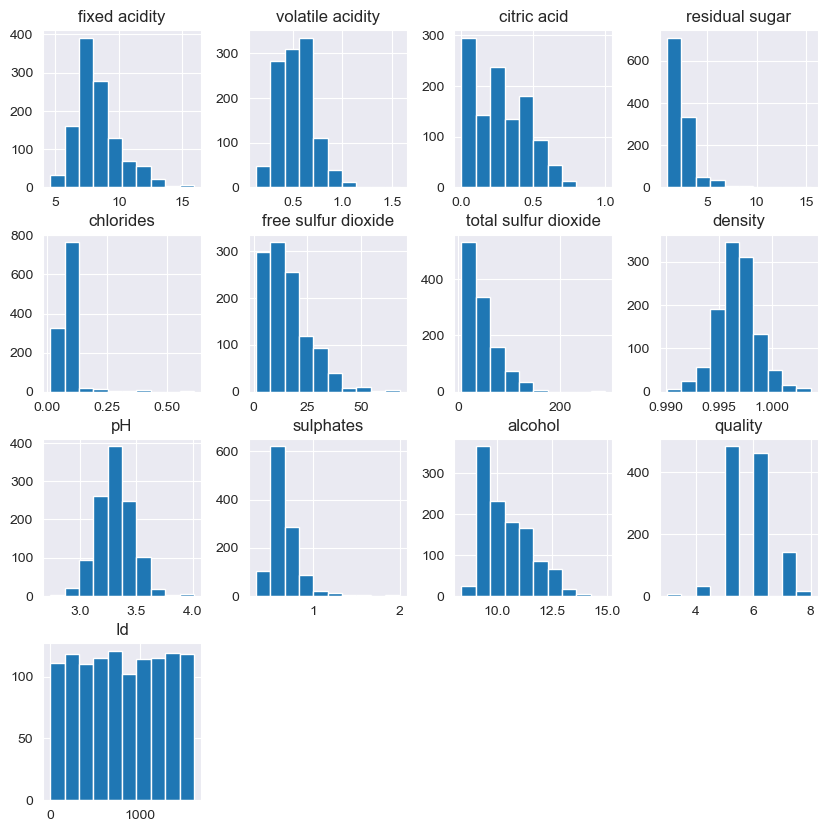

In [4]:
df.hist(figsize=(10,10))
plt.show()

TRANSFORMASI DATA

Melakukan transformasi data feature yang tidak berdistribus normal

Transformasi pada feature volatile acidity

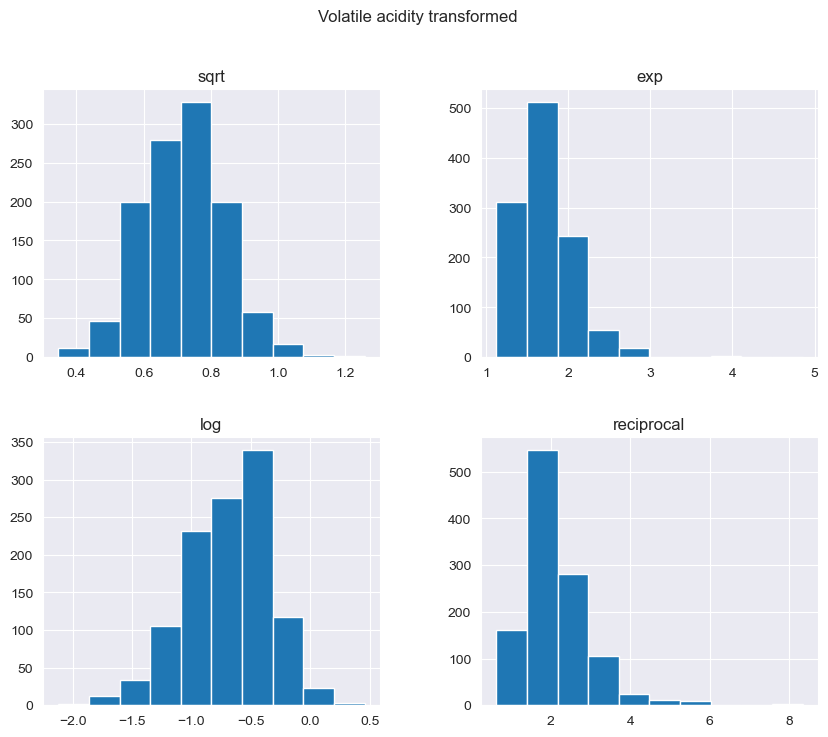

In [5]:
tf2 = df['volatile acidity'].transform([np.sqrt, np.exp, np.log, np.reciprocal])
tf2.hist(figsize=(10,8))
plt.suptitle('Volatile acidity transformed')
plt.show()

In [6]:
df['volatile acidity']=df['volatile acidity'].transform(np.sqrt)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.836660,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.938083,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.871780,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.529150,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.836660,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Transformasi pada feature Citric acid

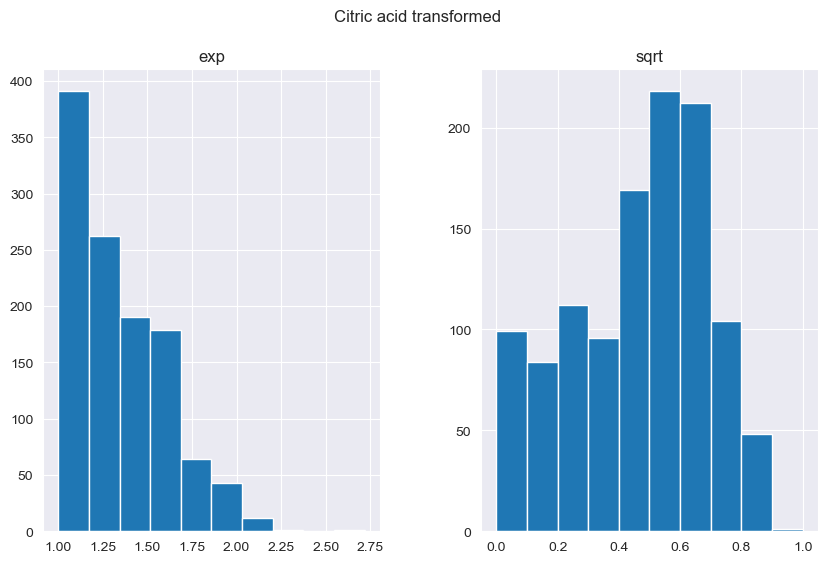

In [7]:
tf1 = df['citric acid'].transform([np.exp,np.sqrt])
tf1.hist(figsize=(10,6))
plt.suptitle('Citric acid transformed')
plt.show()

In [8]:
df['citric acid']=df['citric acid'].transform(np.sqrt)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.836660,0.000000,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.938083,0.000000,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.871780,0.200000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.529150,0.748331,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.836660,0.000000,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Transformasi pada feature residual sugar

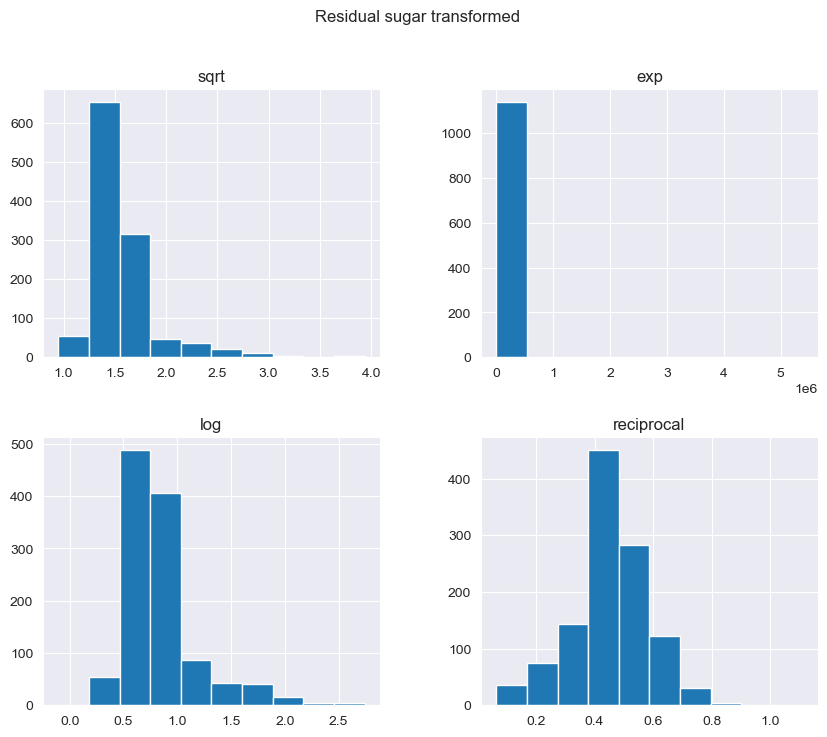

In [9]:
tf3 = df['residual sugar'].transform([np.sqrt, np.exp, np.log, np.reciprocal])
tf3.hist(figsize=(10,8))
plt.suptitle('Residual sugar transformed')
plt.show()

In [10]:
df['residual sugar'] = df['residual sugar'].transform(np.reciprocal)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.836660,0.000000,0.526316,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.938083,0.000000,0.384615,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.871780,0.200000,0.434783,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.529150,0.748331,0.526316,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.836660,0.000000,0.526316,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Transformasi pada feature chlorides

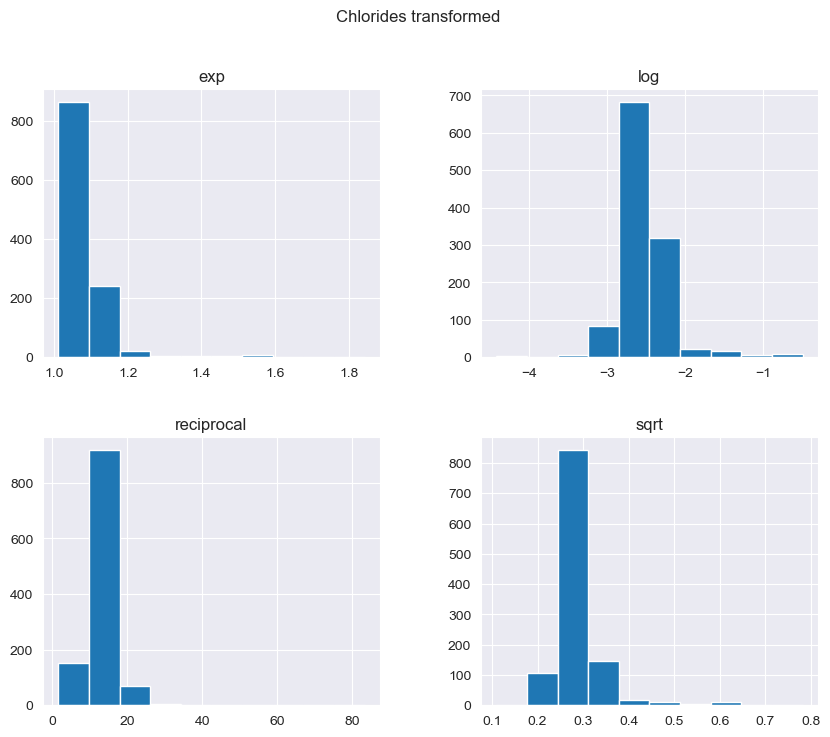

In [11]:
tf4 = df['chlorides'].transform([np.exp,np.log,np.reciprocal,np.sqrt])
tf4.hist(figsize=(10,8))
plt.suptitle('Chlorides transformed')
plt.show()

In [12]:
df['chlorides']=df['chlorides'].transform(np.sqrt)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.836660,0.000000,0.526316,0.275681,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.938083,0.000000,0.384615,0.313050,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.871780,0.200000,0.434783,0.303315,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.529150,0.748331,0.526316,0.273861,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.836660,0.000000,0.526316,0.275681,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Transformasi pada feature free sulfur dioxide

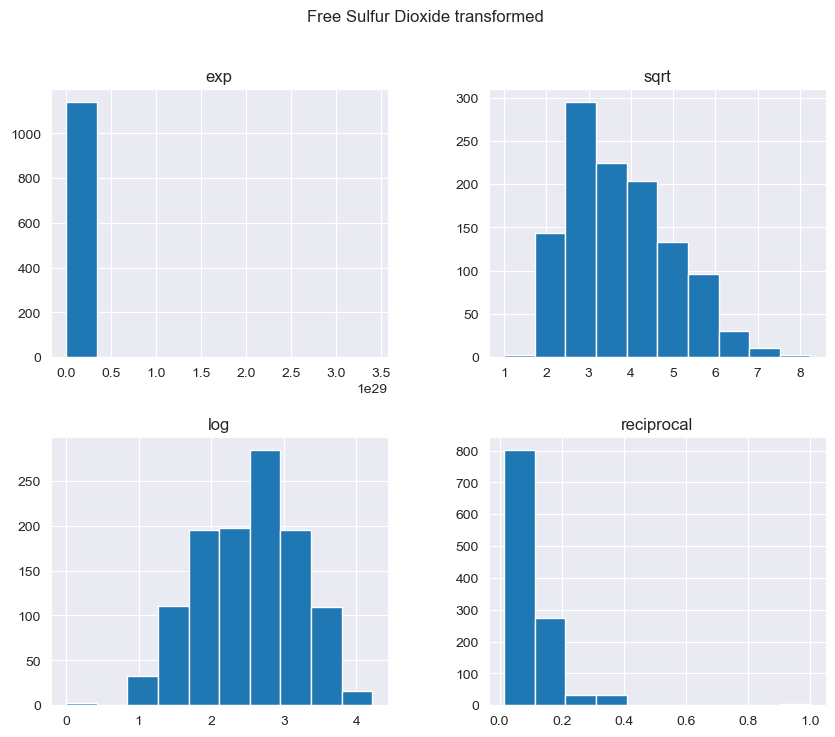

In [13]:
tf5 = df['free sulfur dioxide'].transform([np.exp, np.sqrt, np.log, np.reciprocal])
tf5.hist(figsize=(10,8))
plt.suptitle('Free Sulfur Dioxide transformed')
plt.show()

In [14]:
df['free sulfur dioxide']=df['free sulfur dioxide'].transform(np.log)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.836660,0.000000,0.526316,0.275681,2.397895,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.938083,0.000000,0.384615,0.313050,3.218876,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.871780,0.200000,0.434783,0.303315,2.708050,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.529150,0.748331,0.526316,0.273861,2.833213,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.836660,0.000000,0.526316,0.275681,2.397895,34.0,0.9978,3.51,0.56,9.4,5,4


Transformasi pada feature total sulfur dioxide

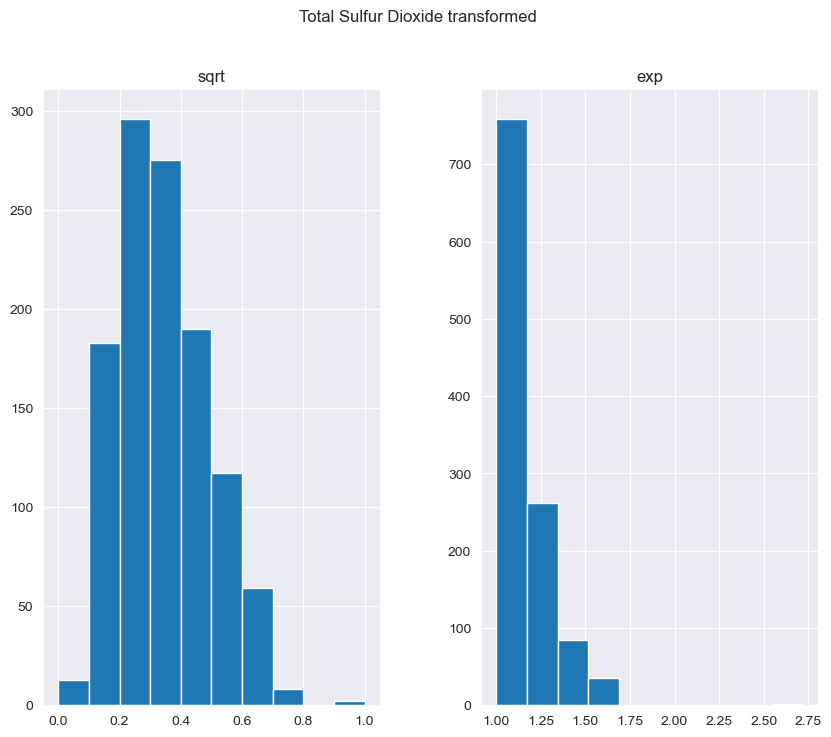

In [15]:
scaller = MinMaxScaler()
df['total sulfur dioxide']=scaller.fit_transform(df[['total sulfur dioxide']])
tf6 = df['total sulfur dioxide'].transform([np.sqrt,np.exp])
tf6.hist(figsize=(10,8))
plt.suptitle('Total Sulfur Dioxide transformed')
plt.show()

In [16]:
df['total sulfur dioxide']=df['total sulfur dioxide'].transform(np.sqrt)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.836660,0.000000,0.526316,0.275681,2.397895,0.314547,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.938083,0.000000,0.384615,0.313050,3.218876,0.464271,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.871780,0.200000,0.434783,0.303315,2.708050,0.411839,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.529150,0.748331,0.526316,0.273861,2.833213,0.436821,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.836660,0.000000,0.526316,0.275681,2.397895,0.314547,0.9978,3.51,0.56,9.4,5,4


Transformasi pada feature alcohol

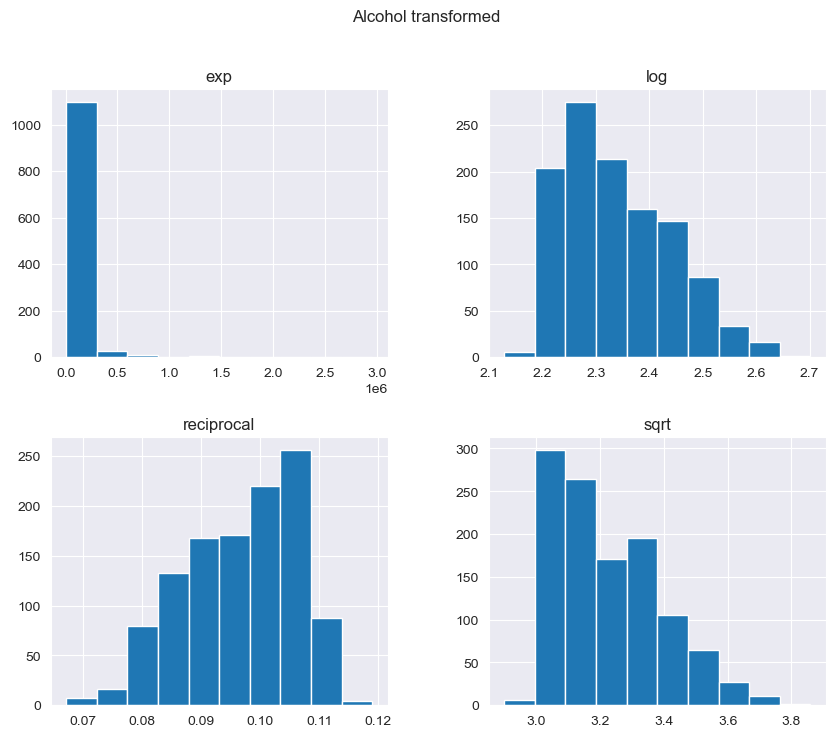

In [17]:
tf7 = df['alcohol'].transform([np.exp,np.log,np.reciprocal,np.sqrt])
tf7.hist(figsize=(10,8))
plt.suptitle('Alcohol transformed')
plt.show()

In [18]:
df['alcohol']=df['alcohol'].transform(np.log)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.836660,0.000000,0.526316,0.275681,2.397895,0.314547,0.9978,3.51,0.56,2.240710,5,0
1,7.8,0.938083,0.000000,0.384615,0.313050,3.218876,0.464271,0.9968,3.20,0.68,2.282382,5,1
2,7.8,0.871780,0.200000,0.434783,0.303315,2.708050,0.411839,0.9970,3.26,0.65,2.282382,5,2
3,11.2,0.529150,0.748331,0.526316,0.273861,2.833213,0.436821,0.9980,3.16,0.58,2.282382,6,3
4,7.4,0.836660,0.000000,0.526316,0.275681,2.397895,0.314547,0.9978,3.51,0.56,2.240710,5,4


Transformasi pada feature sulphates

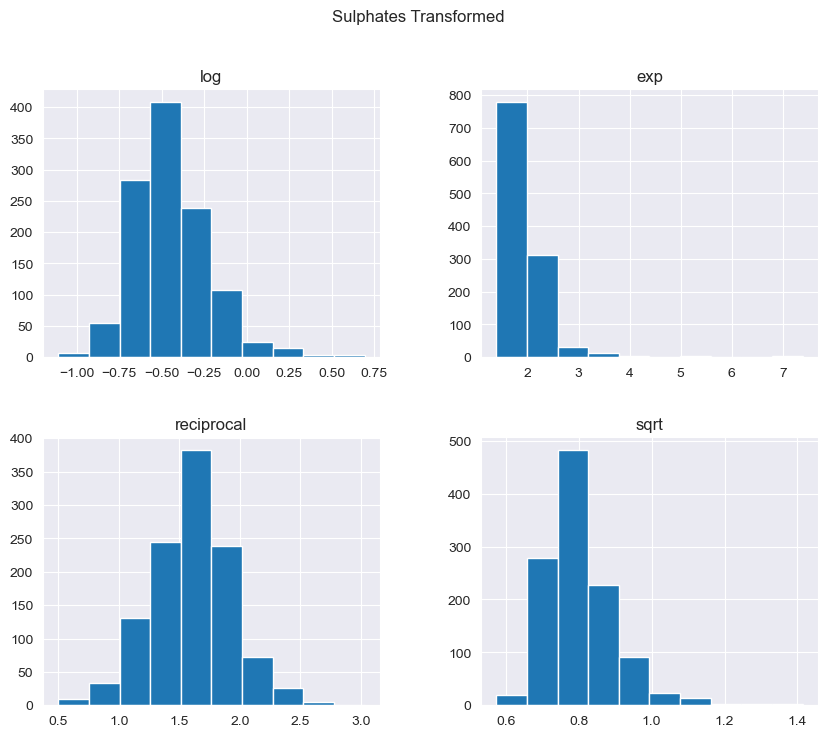

In [19]:
tf8=df['sulphates'].transform([np.log,np.exp,np.reciprocal,np.sqrt])
tf8.hist(figsize=(10,8))
plt.suptitle('Sulphates Transformed')
plt.show()

In [20]:
df['sulphates']=df['sulphates'].transform(np.reciprocal)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.836660,0.000000,0.526316,0.275681,2.397895,0.314547,0.9978,3.51,1.785714,2.240710,5,0
1,7.8,0.938083,0.000000,0.384615,0.313050,3.218876,0.464271,0.9968,3.20,1.470588,2.282382,5,1
2,7.8,0.871780,0.200000,0.434783,0.303315,2.708050,0.411839,0.9970,3.26,1.538462,2.282382,5,2
3,11.2,0.529150,0.748331,0.526316,0.273861,2.833213,0.436821,0.9980,3.16,1.724138,2.282382,6,3
4,7.4,0.836660,0.000000,0.526316,0.275681,2.397895,0.314547,0.9978,3.51,1.785714,2.240710,5,4


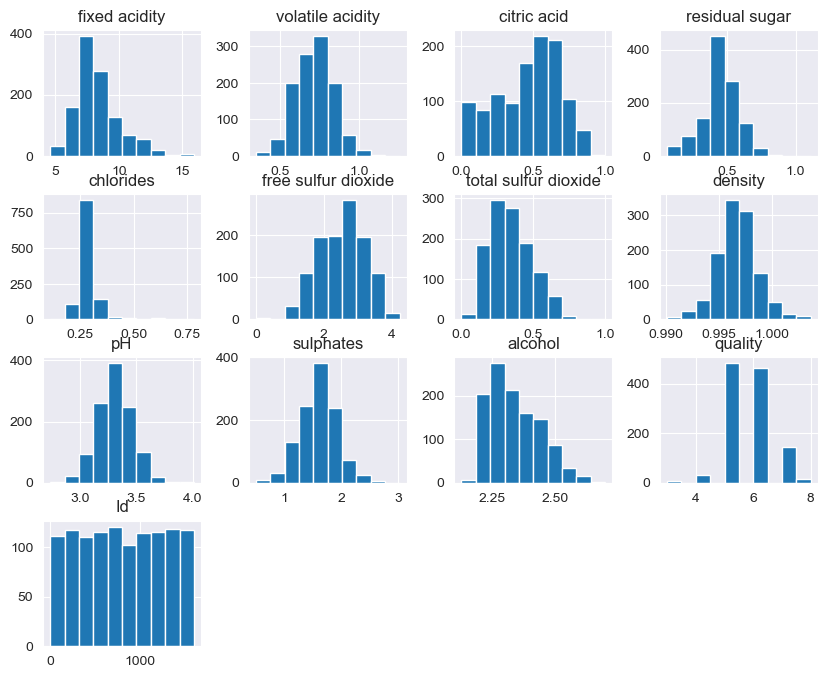

In [21]:
df.hist(figsize=(10,8))
plt.show()

KATEGORISASI UNTUK LABEL OUTPUT

Untuk setiap nilai dari variabel output yang bernilai 3-5 akan dikategorikan sebagai standar sedangkan untuk nilai 6-8 dikategorikan sebagai baik

In [22]:
df['quality'] = df['quality'].apply(lambda x: 'standard' if 3 <= x <= 5 else 'good')

In [23]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.836660,0.000000,0.526316,0.275681,2.397895,0.314547,0.9978,3.51,1.785714,2.240710,standard,0
1,7.8,0.938083,0.000000,0.384615,0.313050,3.218876,0.464271,0.9968,3.20,1.470588,2.282382,standard,1
2,7.8,0.871780,0.200000,0.434783,0.303315,2.708050,0.411839,0.9970,3.26,1.538462,2.282382,standard,2
3,11.2,0.529150,0.748331,0.526316,0.273861,2.833213,0.436821,0.9980,3.16,1.724138,2.282382,good,3
4,7.4,0.836660,0.000000,0.526316,0.275681,2.397895,0.314547,0.9978,3.51,1.785714,2.240710,standard,4


In [24]:
prior_class_good = 621 / (522+621)
df[df['quality'] == 'good']['quality'].count()

621

In [25]:
prior_class_standard = 522 / (522+621)
df[df['quality'] == 'standard']['quality'].count()

522

MENETUKAN VARIABEL INPUT & OUTPUT

Variabel input akan dimasukan ke variabel X dan output akan dimasukan ke variabel y

In [26]:
df.drop('Id', axis=1)
X = df.iloc[:,:-2]
y = df.iloc[:,11]

SPLITTING TRAIN & TEST DATA

Data akan di split dengan perbandingan 8:2 untuk train:test

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, train_size=0.8, random_state=0)

MODELLING

Melakukan pemodelan dengan Gaussian Naive Bayes

In [28]:
model = GaussianNB(priors=[522/1143, 621/1143])
model.fit(X_train, y_train)

GaussianNB(priors=[0.4566929133858268, 0.5433070866141733])

In [29]:
pred_val=model.predict(X_test)
pred_val

array(['standard', 'standard', 'standard', 'standard', 'standard',
       'standard', 'standard', 'good', 'good', 'good', 'standard', 'good',
       'standard', 'standard', 'good', 'standard', 'standard', 'standard',
       'standard', 'standard', 'good', 'standard', 'standard', 'standard',
       'standard', 'standard', 'standard', 'good', 'good', 'standard',
       'standard', 'standard', 'good', 'good', 'good', 'standard',
       'standard', 'good', 'standard', 'good', 'standard', 'good',
       'standard', 'good', 'standard', 'standard', 'standard', 'good',
       'good', 'good', 'standard', 'good', 'standard', 'good', 'standard',
       'standard', 'standard', 'standard', 'standard', 'good', 'standard',
       'standard', 'good', 'standard', 'standard', 'standard', 'good',
       'standard', 'standard', 'standard', 'standard', 'standard',
       'standard', 'good', 'good', 'good', 'good', 'good', 'standard',
       'good', 'standard', 'standard', 'good', 'standard', 'good',
      

In [30]:
accuracy_score(y_test,pred_val)*100

78.60262008733623

In [31]:
print(metrics.classification_report(y_test,pred_val))

              precision    recall  f1-score   support

        good       0.88      0.69      0.77       121
    standard       0.72      0.89      0.80       108

    accuracy                           0.79       229
   macro avg       0.80      0.79      0.79       229
weighted avg       0.80      0.79      0.78       229



In [32]:
print(metrics.confusion_matrix(y_test,pred_val))

[[84 37]
 [12 96]]


CROSS VALIDATION

Untuk mengetes tingkat realibilitas data

In [33]:
pipe = make_pipeline(StandardScaler(), GaussianNB())
scores = cross_val_score(pipe, X, y, cv=5)
scores.mean()

0.731421895349728

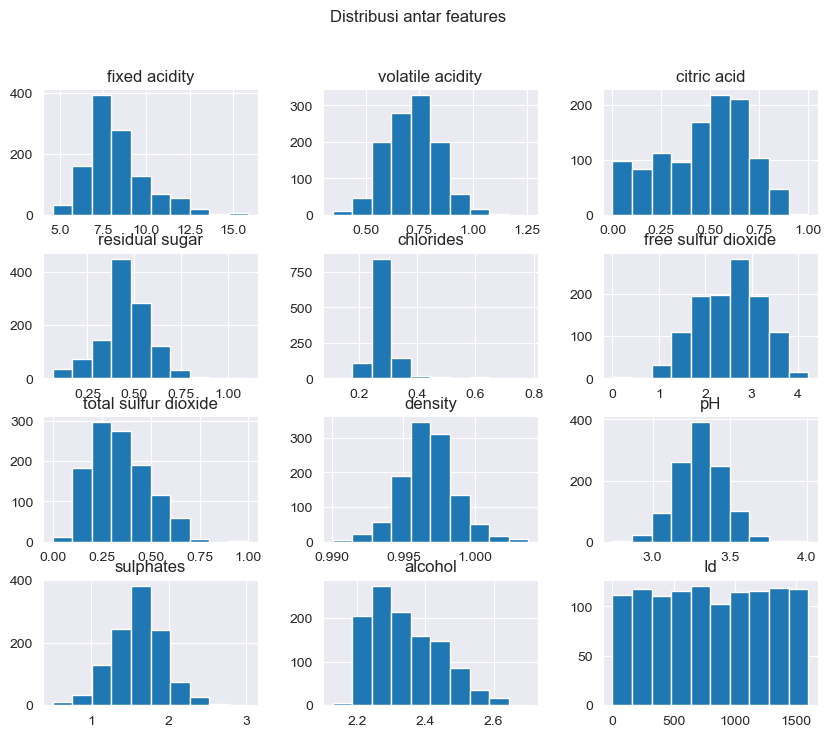

In [35]:
df.hist(figsize=(10,8))
plt.suptitle('Distribusi antar features')
plt.show()

In [38]:
new_test =np.array([8.7, 0.78, 0.12, 0.088, 15, 37, 0.9965, 3.41, 0.67, 10.1])
new_test

array([ 8.7   ,  0.78  ,  0.12  ,  0.088 , 15.    , 37.    ,  0.9965,
        3.41  ,  0.67  , 10.1   ])